#### import packages

In [1]:
# importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_lm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### load data

In [15]:
sml_data = pd.read_excel("C:\\Users\\Divya Krishnan\\Desktop\\ew2.xlsx")


In [16]:
sml_data = sml_data.drop(['EQ20 14.15d Fa-in-law educ','EQ20 14.18a Brother highest educ','EQ20 14.18b Sister highest educ',
               'EQ20 14.18d Sister-in-law highest educ', 'EQ20 14.18c Brother-in-law highest educ'],axis =1)
sml_data = sml_data.fillna(12)

In [17]:
#preparing repose variable
Y_matrix = sml_data.loc[:,['EQ25 17.34 Beat leaves no permit','EQ25 17.35 Beat if extramarital','EQ25 17.36 Beat if no dowry','EQ25 17.37 Beat if House neglect','EQ25 17.38 Beat if not respectful','EQ25 17.39 Beat if bad cooking']]
Y_matrix = Y_matrix.replace(2, 0);
Y = np.sum(Y_matrix,axis = 1)
for thresh in np.arange(1, 6):
    Y_new = (Y >= thresh).astype(float)
    print('Thresh: ', thresh, 'percentage: ', np.mean(Y_new))


Thresh:  1 percentage:  0.8916580219112922
Thresh:  2 percentage:  0.6757078157022494
Thresh:  3 percentage:  0.5019355818131215
Thresh:  4 percentage:  0.3758317941451813
Thresh:  5 percentage:  0.27032360903777547


In [18]:
Y = (Y >= 3).astype(int)
print(np.mean(Y))
sml_data['Beat'] = Y

0.5019355818131215


#### raddomly selecting 1000 datapoints from data

In [19]:
#beat_yes= (data.loc[data['Beat'] == 0])
#beat_no =  (data.loc[data['Beat'] == 1])
#sample_yes =beat_yes.sample(n=500, random_state=2)
#sample_no =beat_no.sample(n=500, random_state=2)
#sml_data = pd.concat([sample_no,sample_yes], axis = 0)
#sml_data = shuffle(sml_data)



In [20]:
response = sml_data["Beat"]


In [21]:
response.shape

(39523,)

#### condensing features

In [102]:
x_education = sml_data.loc[:,[
 'MO Education',
 'Fa Education',
'Brother-in-Law Highest Education',
'Sis-in-law highest edu',
'Fa-in-Law Education',
'Mo-in-law Education']]
x_education = x_education.replace(6, 0);
x_education_all = np.sum(x_education,axis =1)

x_visit = sml_data.loc[:,[ 'EQ23 17.9f Visit health centre alone',
 'EQ23 17.10f Visit Friend home alone',
 'EQ23 17.11f Visit Kirana shop alone',
 'EQ23 17.12f Bus trip alone',
]]
x_visit= x_visit.replace(2, 0)
x_visit_all = np.sum(x_visit,axis =1)


x_decision = sml_data.loc[:,[ 'Cooking Most Say',
 'EQ22 17.4g If sick Most Say',
 'EQ22 17.5g Buy land Most Say',
 'EQ22 17.6g Wedding expense Most Say']]
x_decision_frequent = x_decision.mode(axis = 1)[0]
x_decision_frequent = x_decision_frequent.replace(2, 0)
x_decision_frequent = x_decision_frequent.replace(3, 0)
x_decision_frequent = x_decision_frequent.replace(4, 0)
x_decision_frequent = x_decision_frequent.replace(5, 0)
x_decision_frequent =x_decision_frequent.replace(6, 0)



x_service = sml_data.loc[:,['EQ23 17.18a Member Mahila Mandal',
 'EQ23 17.18b Member Self-help',
 'EQ23 17.18c Member Savings group',
 'EQ23 17.18d Member Political org',
 'EQ23 17.19 Attended panchayat']]
x_service= x_service.replace(2, 0)
x_service_frequent = np.sum(x_service,axis = 1)



x_children_decision = sml_data.loc[:,[ 'EQ22 17.7g Child ill Most Say',
   'Children Most Say',
   'EQ22 17.8g Childs wed Most Say' ]]
x_children_decision = x_children_decision.replace(2, 0)
x_children_decision = x_children_decision.replace(3, 0)
x_children_decision = x_children_decision.replace(4, 0)
x_children_decision = x_children_decision.replace(5, 0)
x_children_decision = x_children_decision.replace(6, 0)
x_children_decision_frequent = x_children_decision.mode(axis = 1)[0]

x_work =  sml_data.loc[:,[   
 'EQ25 17.48 Willing to work',
'EQ25 17.49 Allowed to work'
]]
x_work = x_work.replace(2, 0)
x_work_sum = np.sum(x_work,axis =1)


X_quant = sml_data.loc[:,[
'EQ26 18.1a Age at marriage']]

x_people_hh = sml_data.loc[:,[
    'EQ20 14.13a Mo in hh',
    'EQ20 14.13b Fa in hh',
    'EQ20 14.13c Mo-in-law in hh',
    'EQ20 14.13d Fa-in-law in hh']]

x_people_hh = x_people_hh.replace(2, 0)
x_people_hh = x_people_hh.replace(3, 0)
x_people_hh = x_people_hh.replace(4, 0)
x_people_hh_all = np.sum(x_people_hh,axis =1)


x_contact =  sml_data.loc[:,[ 'EQ26 18.5a Had met husband',
 'EQ26 18.5b Had talked to husband',
 'EQ26 18.5c Had seen husband photo',
 'EQ26 18.5d Had emailed husband',
'EQ26 18.3 Knew husb before wed']]
x_contact = x_contact.replace(2, 0)
x_contact_sum = np.sum(x_contact,axis =1)
                       
                       
x_money = sml_data.loc[:,[ 'EQ24 17.26 Cash-in-hand',
 'EQ25 17.46a Worked for NREGA',
 'EQ24 17.27a Family bank account',
 'EQ24 17.27b Resp account holder',
 'EQ24 17.28 House papers: Woman',
 'EQ25 17.46b Working for wage']]
x_money_frequent = x_money.mode(axis = 1)[0]
x_money_frequent = x_money_frequent.replace(2, 0)

                                              
x_discuss = sml_data.loc[:,[ 'EQ24 17.29a Discuss: Work/farm',
 'EQ24 17.29b Discuss: Expenditure',
 'EQ24 17.29c Discuss: Politics']]
x_discuss_frequent = x_discuss.mode(axis = 1)[0]
x_discuss_frequent = x_discuss_frequent.replace(2, 0);
x_discuss_frequent = x_discuss_frequent.replace(3, 0);

                       

x_natal = sml_data.loc[:,[ 'EQ24 17.30 Natal family visit',
 'EQ24 17.31 Natal family freq',
 'EQ24 17.32 Natal family talk'
'General Health of Indv.']]
x_natal = x_natal.replace(6, 0);
x_natal_frequent = x_natal.mode(axis = 1)[0]

x_harass = sml_data['EQ25 17.45 Harassment of girls']
x_harass = x_harass.replace(2, 0)
x_harass = x_harass.replace(3, 0)
x_harass = x_harass.replace(4, 0)
                       
x_connecting_outside = sml_data.loc[:,['EQ23 17.13 Been to metro city',
 'EQ23 17.14 Been to a town',
 'EQ23 17.16 Been to another stated',
 'EQ23 17.17 Been abroad']]
x_connecting_outside= x_connecting_outside.replace(2, 0)
x_connecting_all = np.sum(x_connecting_outside,axis = 1)    

x_purchase = sml_data['Purchase Most Say']
x_purchase = x_purchase.replace(2, 0)
x_purchase = x_purchase.replace(3, 0)
x_purchase = x_purchase.replace(4, 0)
x_purchase = x_purchase.replace(5, 0)
x_purchase = x_purchase.replace(6, 0)


#### normalize

In [103]:
X= X_quant.replace(88, 18);


In [104]:
X['x_education_of_family'] = x_education_all

In [105]:
len(X.columns)

2

In [106]:
X=(X-X.mean())/X.std()


In [107]:
x_work_sum= (x_work_sum >= 1).astype(int)
print(np.mean(x_work_sum))

0.4484730410140931


In [108]:
x_natal_frequent = (x_natal_frequent <= 3).astype(int)
print(np.mean(x_natal_frequent))

0.8519849201730638


In [109]:
x_contact_sum = (x_contact_sum > 1).astype(int)
print(np.mean(x_contact_sum))

0.3950105002150646


In [110]:
x_visit_all = (x_visit_all > 3).astype(int)
print(np.mean(x_visit_all))

0.4552792045138274


In [111]:
x_service_frequent = (x_service_frequent >1).astype(int)
print(np.mean(x_service_frequent ))

0.08645598765275915


In [115]:
x_connecting_all = (x_connecting_all >1).astype(int)
print(np.mean(x_connecting_all ))

0.21417908559572907


#### craete feature vector

In [122]:
X['x_husband_contact'] = x_contact_sum
X['x_working_freedom'] = x_work_sum
X['x_financial_backing_wife'] = x_money_frequent
X['x_freedom_to_travel'] = x_visit_all
X['x_decision_household'] = x_decision_frequent
X['x_discuss_family'] = x_discuss_frequent
X['x_natal_closeness_and_health'] = x_natal_frequent
X['x_connecting_outside'] = x_connecting_all
X['x_pruchasing_power'] = x_purchase
X['x_social_presence'] = x_service_frequent
X['x_harassment_in_town'] = x_harass
X['x_people_household'] = x_people_hh_all
X['x_decision_regarding_children'] = x_children_decision_frequent


In [123]:
p = len(X.columns)

In [124]:
X.head()

,EQ26 18.1a Age at marriage,x_education_of_family,x_husband_contact,x_working_freedom,x_financial_backing_wife,x_freedom_to_travel,x_decision_household,x_discuss_family,x_natal_closeness_and_health,x_pruchasing_power,x_connecting_outside_world,x_harassment_in_town,x_people_household,x_decision_regarding_children,x_connecting_outside,x_social_presence
0,-2.130681,-0.656141,1,1,0.0,1,1.0,1.0,1,0,0,1,0,0.0,0,0
1,0.019682,0.439868,1,1,0.0,1,0.0,1.0,1,1,0,1,2,0.0,0,0
2,0.557273,0.439868,1,0,1.0,0,1.0,1.0,1,0,0,1,1,1.0,0,0
3,0.557273,-0.656141,0,1,0.0,1,1.0,0.0,1,0,0,1,0,1.0,0,0
4,1.094864,-1.094545,1,1,0.0,1,1.0,0.0,1,0,0,1,0,1.0,0,0


#### test train split

In [125]:
def test_train_split(X,Y,n_split):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,  test_size = n_split)
    return(X_train, X_test, Y_train, Y_test)

In [126]:
def check_acc(clf, x_test, y_test):
    acc = accuracy_score(y_test, clf.predict(x_test));
#     print("Accuracy: ", acc)
    return acc

#### Random Forest

#### 2p

In [127]:
lambda_parameter = 10.0**np.arange(-3, 3,0.6)


In [128]:
lambda_parameter

array([1.00000000e-03, 3.98107171e-03, 1.58489319e-02, 6.30957344e-02,
       2.51188643e-01, 1.00000000e+00, 3.98107171e+00, 1.58489319e+01,
       6.30957344e+01, 2.51188643e+02])

#### 10 fold cv for 2p

In [129]:
clf_cv = LogisticRegressionCV(Cs = lambda_parameter, cv = 3, penalty='l2' )#

In [131]:
from sklearn.cross_validation import KFold

def xValLogistic(dataset_x, dataset_y, k, cs):
    cv = KFold(n = dataset_x.shape[0], n_folds = k)
    train_acc = {}
    val_acc = {}
    for c in cs:
        train_acc[c] = [];
        val_acc[c] = [];
    
    for train_idx, test_idx in cv:
        train_x = dataset_x.iloc[train_idx]
        train_y = dataset_y.iloc[train_idx]
        test_x = dataset_x.iloc[test_idx]    
        test_y = dataset_y.iloc[test_idx]
        
        for c in cs:
            clf = LogisticRegression(penalty='l2', C = 1/c)
            clf.fit(train_x, train_y)
            train_score =1-check_acc(clf, train_x, train_y)
            val_score =1-check_acc(clf, test_x, test_y)
            train_acc[c].append(train_score)
            val_acc[c].append(val_score)
        
    
    best_c = 0;
    best_val = float('inf');
    train_list = np.zeros(len(cs));
    val_list = np.zeros(len(cs));
    for i, c in enumerate(cs):
        train_list[i] = np.mean(train_acc[c]);
        val_list[i] = np.mean(val_acc[c]);
        if best_val > val_list[i]:
            best_val = val_list[i];
            best_c = c;
    
            
    return train_list, val_list, best_c
    
            


In [ ]:
def xValrandom_forest(dataset_x, dataset_y, k):
    cv = KFold(n = dataset_x.shape[0], n_folds = k)
    train_acc = []
    val_acc = []

    
    for train_idx, test_idx in cv:
        train_x = dataset_x.iloc[train_idx]
        train_y = dataset_y.iloc[train_idx]
        test_x = dataset_x.iloc[test_idx]    
        test_y = dataset_y.iloc[test_idx]
        
        clf = RandomForestClassifier(5)
        clf.fit(train_x, train_y)
        train_score =1-check_acc(clf, train_x, train_y)
        val_score =1-check_acc(clf, test_x, test_y)
        train_acc.append(train_score)
        val_acc.append(val_score)


            
    return np.mean(val_acc)

In [ ]:
def xVallogistic_regression(dataset_x, dataset_y, k):
    cv = KFold(n = dataset_x.shape[0], n_folds = k)
    train_acc = []
    val_acc = []

    
    for train_idx, test_idx in cv:
        train_x = dataset_x.iloc[train_idx]
        train_y = dataset_y.iloc[train_idx]
        test_x = dataset_x.iloc[test_idx]    
        test_y = dataset_y.iloc[test_idx]
        
        clf = LogisticRegression()
        clf.fit(train_x, train_y)
        train_score =1-check_acc(clf, train_x, train_y)
        val_score =1-check_acc(clf, test_x, test_y)
        train_acc.append(train_score)
        val_acc.append(val_score)


    
            
    return np.mean(val_acc)

In [217]:
def xValLogistic_lasso(dataset_x, dataset_y, k, cs):
    cv = KFold(n = dataset_x.shape[0], n_folds = k)
    train_acc = {}
    val_acc = {}
    for c in cs:
        train_acc[c] = [];
        val_acc[c] = [];
    
    for train_idx, test_idx in cv:
        train_x = dataset_x.iloc[train_idx]
        train_y = dataset_y.iloc[train_idx]
        test_x = dataset_x.iloc[test_idx]    
        test_y = dataset_y.iloc[test_idx]
        
        for c in cs:
            clf = LogisticRegression(penalty='l1', C = 1/c)
            clf.fit(train_x, train_y)
            train_score =1- check_acc(clf, train_x, train_y)
            val_score =1- check_acc(clf, test_x, test_y)
            train_acc[c].append(train_score)
            val_acc[c].append(val_score)

    
    best_c = 0;
    best_val = float('inf');
    train_list = np.zeros(len(cs));
    val_list = np.zeros(len(cs));
    for i, c in enumerate(cs):
        train_list[i] = np.mean(train_acc[c]);
        val_list[i] = np.mean(val_acc[c]);
        if best_val > val_list[i]:
            best_val = val_list[i];
            best_c = c;
    
            
    return train_list, val_list, best_c    
            


In [220]:
def plot_cross_val(X,response, split):
    train_features,test_features,train_labels,test_labels= test_train_split(X,response, split)
    train_acc, val_acc, best_c1 = xValLogistic(train_features,train_labels,10,lambda_parameter)
    train_acc2, val_acc2,best_c2 = xValLogistic_lasso(train_features,train_labels,10,lambda_parameter)
    return(best_c1,best_c2)

In [221]:
y1,y2=plot_cross_val(X,response, 0.2)

In [227]:
def feature_imp(X,response, split,k1,k2):
    x_train,x_test,y_train,y_test= test_train_split(X,response,split)
    
    clf = LogisticRegression(penalty='l2', C = 1/k1)
    clf.fit(x_train, y_train)
    logreg_weight1 = np.abs(clf.coef_[0]);
    logreg_weight1 /= np.sum(logreg_weight1)
        
    clf3 = LogisticRegression()
    clf3.fit(x_train, y_train)
    logreg_weight2 = np.abs(clf3.coef_[0]);
    logreg_weight2 /= np.sum(logreg_weight2)
    
    clf4 = RandomForestClassifier(1)
    clf4.fit(x_train, y_train)
    logreg_weight3 = clf4.feature_importances_
    logreg_weight3 /= np.sum(logreg_weight3)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10), sharex=True, sharey=True)    

    feature_importance_plot(ax[0], logreg_weight1)
    feature_importance_plot(ax[1], logreg_weight2)
    feature_importance_plot(ax[2], logreg_weight3)
        
    
    plt.sca(ax[0])
    plt.yticks(range(len(X.columns)), X.columns)
    
    return(logreg_weight1,logreg_weight2,logreg_weight3)

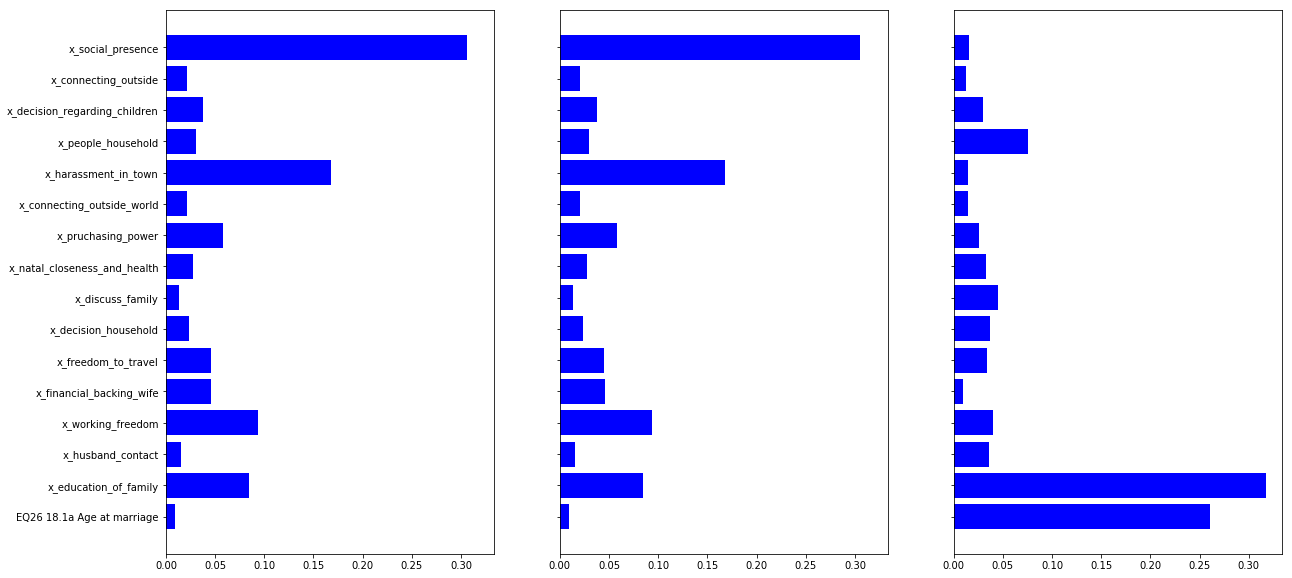

In [228]:
w1,w2,w3=feature_imp(X,response,0.2,y1,y2)

In [226]:
def feature_importance_plot(ax, importance):

#     plt.title('Feature Importances')
    ax.barh(range(len(importance)), importance, color='b', align='center')
#     ax.yticks(range(len(features)), features)
#     plt.xlabel('Relative Importance')
    